In [30]:
import numpy as np
import itertools
import scipy.stats as stats

### brute force shapley & linear mapping

In [48]:
def shapley_mapping(f, x):
    phi = np.zeros(len(x))
    indx = np.arange(len(x))
    n_coal = 0

    # for each element of x
    for count, value in enumerate(x):

        # for each coalition size, 1:N
        for c_size in np.arange(1,len(x)+1):

            # for each coalition (within a specific size)
            for c in itertools.combinations(indx, c_size):

                # if element appears in coalition
                c_list = list(c)
                if count in c_list:
                    c_list_drop = c_list.copy()
                    c_list_drop.remove(count)
                    phi[count] += f(x[c_list]) - f(x[c_list_drop])
                    n_coal += 1

    # scale by 1/2^(N-1)
    return(phi * len(x) / n_coal)

def linear_mapping(f, x):
    delta_y = f(x) - f([])
    scalar = delta_y / np.sum(x)
    return(x*scalar)

def run_comparison(x_len, N, f):
    shap_case = np.array([])
    linear_case = np.array([])

    for n in np.arange(N):
        x = stats.logistic.rvs(size=x_len)*.1        # dealer's choice
        shap_case = np.append(shap_case, shapley_mapping(f, x))
        linear_case = np.append(linear_case, linear_mapping(f, x))

    return shap_case, linear_case

### test case

In [49]:
# function must be of type y = f(x); single input, single output
def sigmoid(x):
    return((1/(1+np.exp(-np.sum(x)))))

x_len = 12         # size of x
N = 100            # trials

shap_vals, linear_vals = run_comparison(x_len, N, sigmoid)

### plot result

Pearson R correlation score: 0.9999


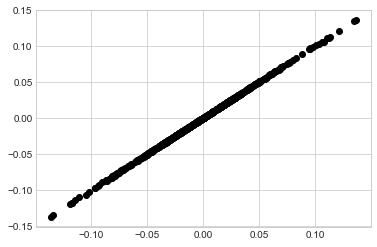

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(shap_case, linear_case, 'o', color='black');
print("Pearson R correlation score: {:.4f}".format(stats.stats.pearsonr(shap_vals,linear_vals)[0]))